In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu # T-test for independent samples, Mann-Whitney U test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway, kruskal # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
# from scipy.stats import kstest # KS test for Normality

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
# Importing dataset

path = '/content/bike_sharing.csv'

df = pd.read_csv(path)

In [ ]:
# Inspecting dataset

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Checking Shape of dataset

print("No. of rows : ", df.shape[0])

No. of rows :  10886


In [ ]:
# Checking basic info of datasets or characterstics

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# checking the missing values in the dataset

df.isnull().sum() # Featurewise null values

# df.isnull().sum().sum(); # Total null values

# no missing values in the data

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
# Inspecting statistical summary

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Checking for duplicate rows

dup_rows = df[df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  0


In [ ]:
# creating a func. to find unique values in categorical columns

def unique_values(df, cols):
  print("Unique values: ", df[cols].unique())
  print("value_counts: ", )
  print(df[cols].value_counts())

In [ ]:
# checking for distinct values in categorical columns

cols_list = ['workingday',	'holiday',	'weather', 'season']

for cols in cols_list:
  print(cols, "-")
  unique_values(df, cols)
  print("\n")

workingday -
Unique values:  [0 1]
value_counts: 
workingday
1    7412
0    3474
Name: count, dtype: int64


holiday -
Unique values:  [0 1]
value_counts: 
holiday
0    10575
1      311
Name: count, dtype: int64


weather -
Unique values:  [1 2 3 4]
value_counts: 
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


season -
Unique values:  [1 2 3 4]
value_counts: 
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64




# Mutlivariate Analysis:

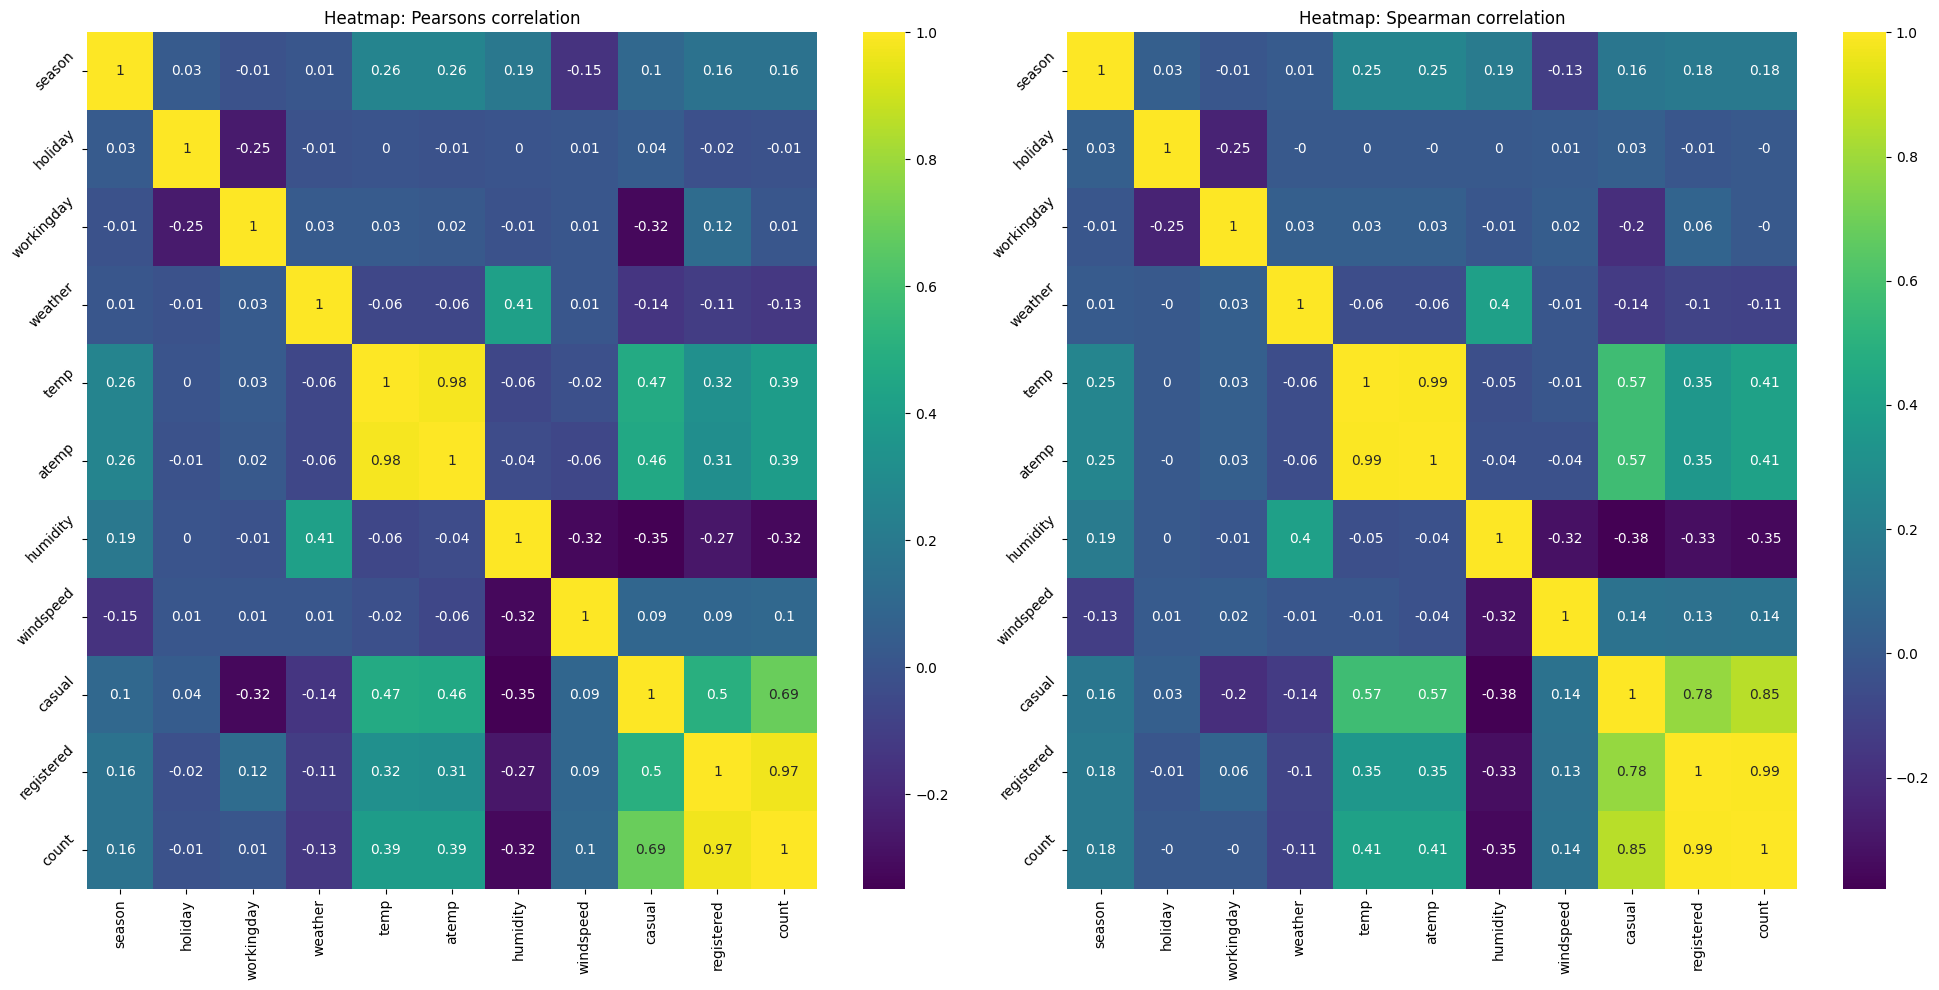

In [ ]:
# Correlation Heatmap - checking for Linear Relationships and Non-linear relationships

numeric_features = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.title('Heatmap: Pearsons correlation')
sns.heatmap(df[numeric_features].corr(method='pearson').round(2),  # Using 'Pearson' correlation for finding linear relationship
            annot=True, cmap='viridis')
plt.yticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Heatmap: Spearman correlation')
sns.heatmap(df[numeric_features].corr(method='spearman').round(2),  # Using 'Spearman' correlation for finding non-linear relationship
            annot=True, cmap='viridis')
plt.yticks(rotation=45)

plt.tight_layout() # Adjust layout to prevent overlapping

plt.show()

## Key Points:

* atemp (or apparent temprature) and temp features are highly correlated, i.e. they are carrying almost same information. We can think of dropping either one of them to avoid redundancies.

* count, causal, registered are also showing correlation amongst each other because: causal + registered = count.

#### But first, let us check the patterns visually

# Performing some visual analysis to verify the relationships using Scatter-Plot:

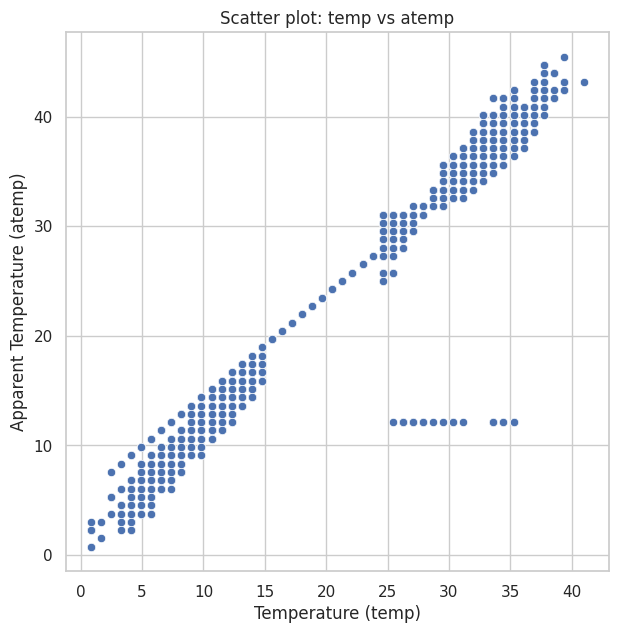

In [ ]:
# PLotting Scatter-plot between temp and atemp column

plt.figure(figsize=(7, 7))  # Slightly larger square figure

sns.set(style="whitegrid")

# plt.subplots_adjust(right=1) # Adjusted margins

plt.title('Scatter plot: temp vs atemp')
sns.scatterplot(x=df['temp'], y=df['atemp'])
plt.xlabel('Temperature (temp)')
plt.ylabel('Apparent Temperature (atemp)')

plt.show()

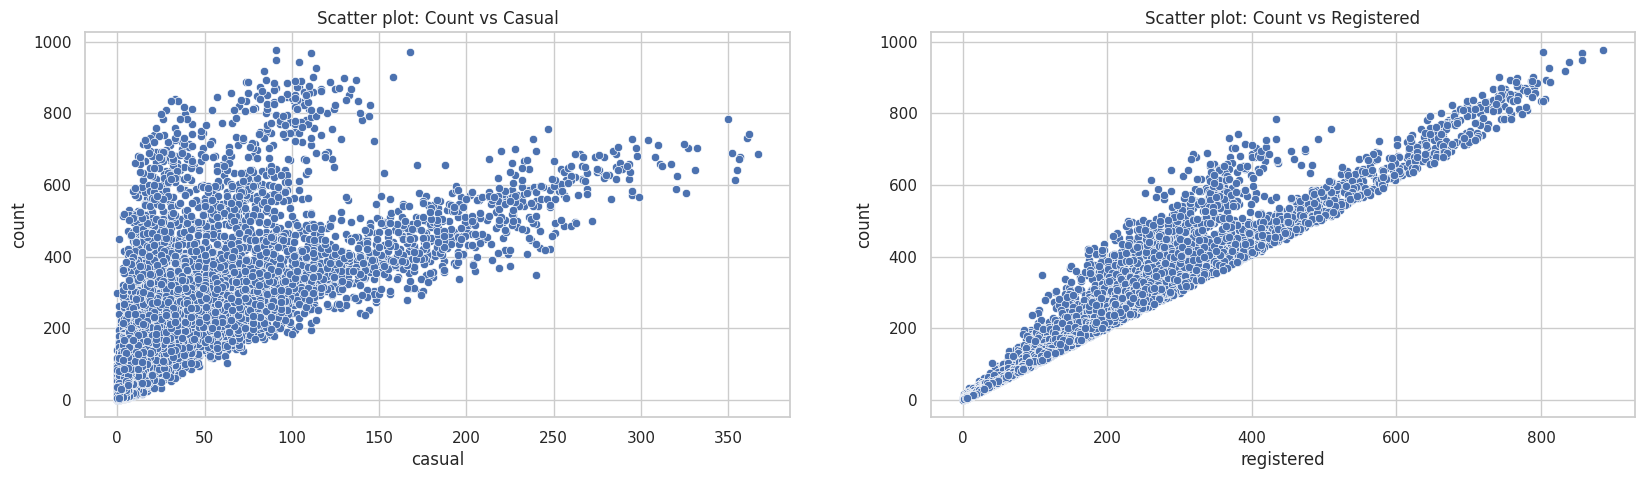

In [ ]:
# PLotting Scatter-plot between 'Count vs Casual' and 'Count vs Registered' cols

plt.figure(figsize = (20, 5))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.title('Scatter plot: Count vs Casual')
sns.scatterplot(x = df['casual'], y = df['count'])

plt.subplot(1,2,2)
plt.title('Scatter plot: Count vs Registered')
sns.scatterplot(x = df['registered'], y = df['count'])

plt.show()

# Dropping Highly correlated cols to avoid redundant information

In [ ]:
# Dropping highly correlated columns -

dfn = df.drop(columns=['casual', 'registered', 'atemp'])

In [ ]:
dfn.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1


# Univariate Analysis - Independent Variables
## Continous Variable:

#### Here we are plotting Distribution plots and Box plots, in order to visualize the Data Distribution and also observe the outliers, if any, respectively.

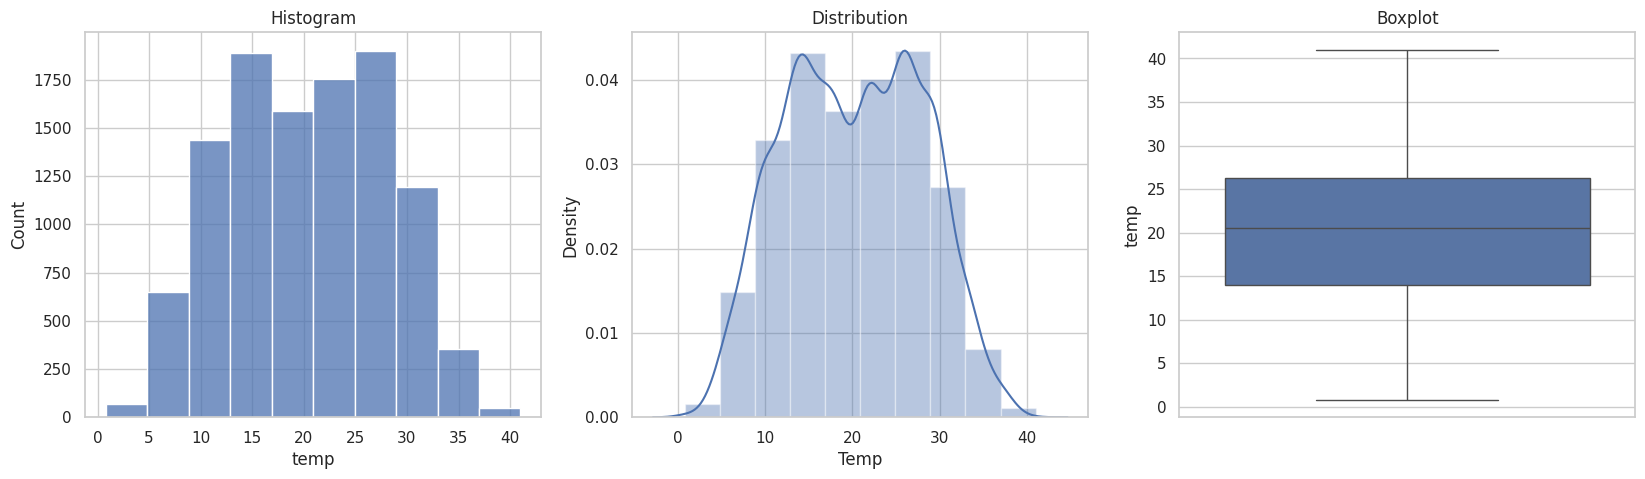

In [ ]:
# Distribution plot and Box plot of 'temp' feature

plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
sns.histplot(x = dfn['temp'], bins = 10)
plt.title('Histogram')

plt.subplot(1,3,2)
sns.distplot(x = dfn['temp'], bins = 10)
plt.xlabel('Temp')
plt.title('Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=dfn['temp'])
plt.title('Boxplot')

plt.show()

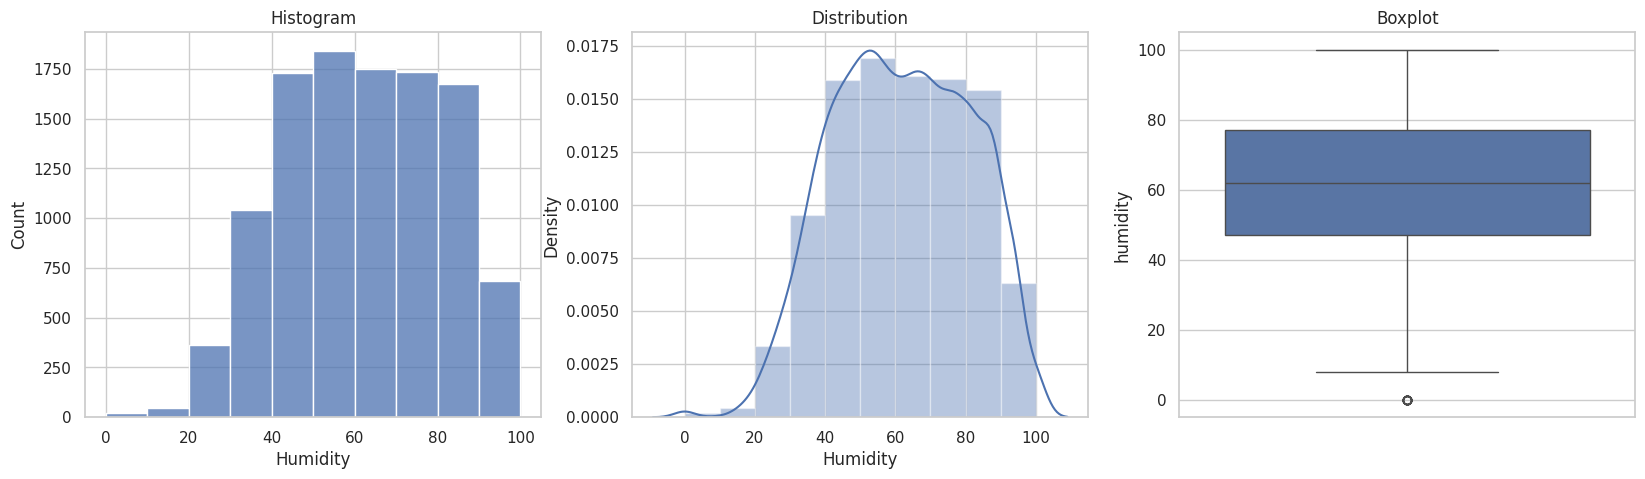

In [ ]:
# Distribution plot and Box plot of 'humidity' feature

plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
sns.histplot(x = dfn['humidity'], bins = 10)
plt.xlabel('Humidity')
plt.title('Histogram')

plt.subplot(1,3,2)
sns.distplot(x = dfn['humidity'], bins = 10)
plt.xlabel('Humidity')
plt.title('Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=dfn['humidity'])
plt.title('Boxplot')

plt.show()

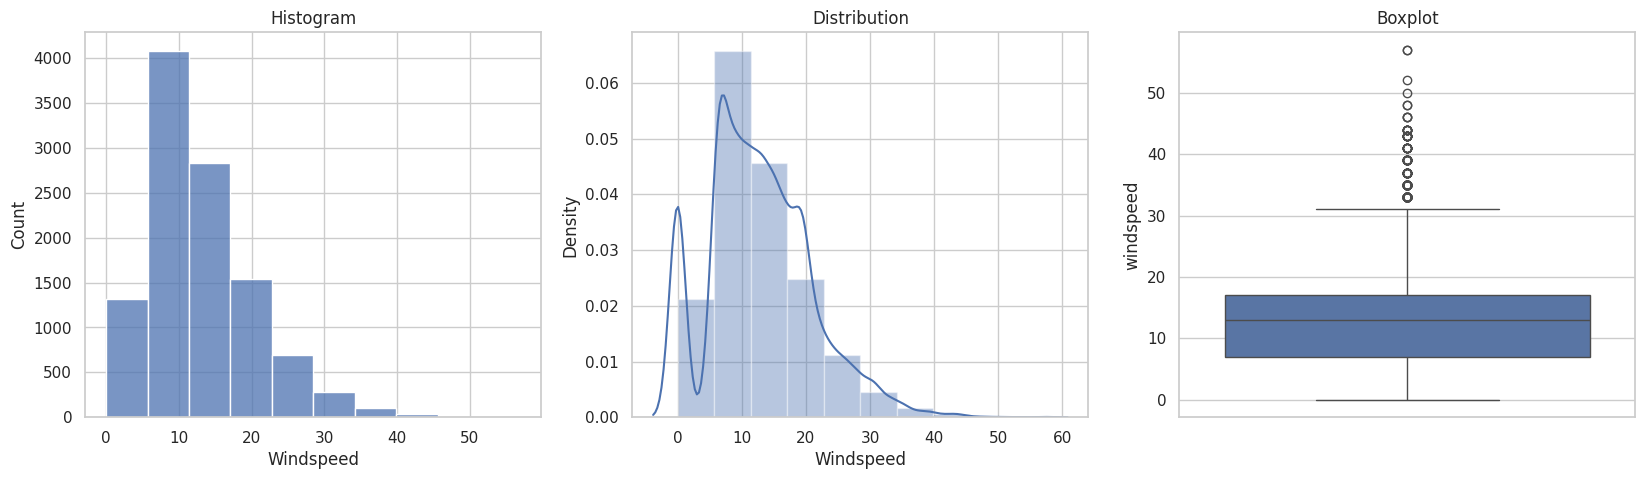

In [ ]:
# Distribution plot and Box plot of 'windspeed' feature

plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
sns.histplot(x = dfn['windspeed'], bins = 10)
plt.xlabel('Windspeed')
plt.title('Histogram')

plt.subplot(1,3,2)
sns.distplot(x = dfn['windspeed'], bins = 10)
plt.xlabel('Windspeed')
plt.title('Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=dfn['windspeed'])
plt.title('Boxplot')

plt.show()

# Removing 'atemp', 'casual' and 'registered' columns from our analysis for now as they are higlhy correlated, please refer the Heatmap and Scatter plot section for more clarity
# Keeping the code handy, just in case.

In [ ]:
'''
# Distribution plot and Box plot of 'atemp' feature

plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
sns.histplot(x = df['atemp'], bins = 10)
plt.xlabel('atemp')
plt.title('Histogram')

plt.subplot(1,3,2)
sns.distplot(x = df['atemp'], bins = 10)
plt.xlabel('atemp')
plt.title('Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['atemp'])
plt.title('Boxplot')

plt.show()
'''

"\n# Distribution plot and Box plot of 'atemp' feature\n\nplt.figure(figsize = (20, 5))\n\nplt.subplot(1,3,1)\nsns.histplot(x = df['atemp'], bins = 10)\nplt.xlabel('atemp')\nplt.title('Histogram')\n\nplt.subplot(1,3,2)\nsns.distplot(x = df['atemp'], bins = 10)\nplt.xlabel('atemp')\nplt.title('Distribution')\n\nplt.subplot(1, 3, 3)\nsns.boxplot(y=df['atemp'])\nplt.title('Boxplot')\n\nplt.show()\n"

In [ ]:
'''
# Distribution plot and Box plot of 'casual' feature

plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
sns.histplot(x = df['casual'], bins = 10)
plt.xlabel('Casual')
plt.title('Histogram')

plt.subplot(1,3,2)
sns.distplot(x = df['casual'], bins = 10)
plt.xlabel('Casual')
plt.title('Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['casual'])
plt.title('Boxplot')

plt.show()
'''

"\n# Distribution plot and Box plot of 'casual' feature\n\nplt.figure(figsize = (20, 5))\n\nplt.subplot(1,3,1)\nsns.histplot(x = df['casual'], bins = 10)\nplt.xlabel('Casual')\nplt.title('Histogram')\n\nplt.subplot(1,3,2)\nsns.distplot(x = df['casual'], bins = 10)\nplt.xlabel('Casual')\nplt.title('Distribution')\n\nplt.subplot(1, 3, 3)\nsns.boxplot(y=df['casual'])\nplt.title('Boxplot')\n\nplt.show()\n"

In [ ]:
'''
# Distribution plot and Box plot of 'registered' feature

plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
sns.histplot(x = df['registered'], bins = 10)
plt.xlabel('Registered')
plt.title('Histogram')

plt.subplot(1,3,2)
sns.distplot(x = df['registered'], bins = 10)
plt.xlabel('Registered')
plt.title('Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['registered'])
plt.title('Boxplot')

plt.show()
'''

"\n# Distribution plot and Box plot of 'registered' feature\n\nplt.figure(figsize = (20, 5))\n\nplt.subplot(1,3,1)\nsns.histplot(x = df['registered'], bins = 10)\nplt.xlabel('Registered')\nplt.title('Histogram')\n\nplt.subplot(1,3,2)\nsns.distplot(x = df['registered'], bins = 10)\nplt.xlabel('Registered')\nplt.title('Distribution')\n\nplt.subplot(1, 3, 3)\nsns.boxplot(y=df['registered'])\nplt.title('Boxplot')\n\nplt.show()\n"

# Univariate & Bivariate Analysis - Independent Variables
## Discrete Variable

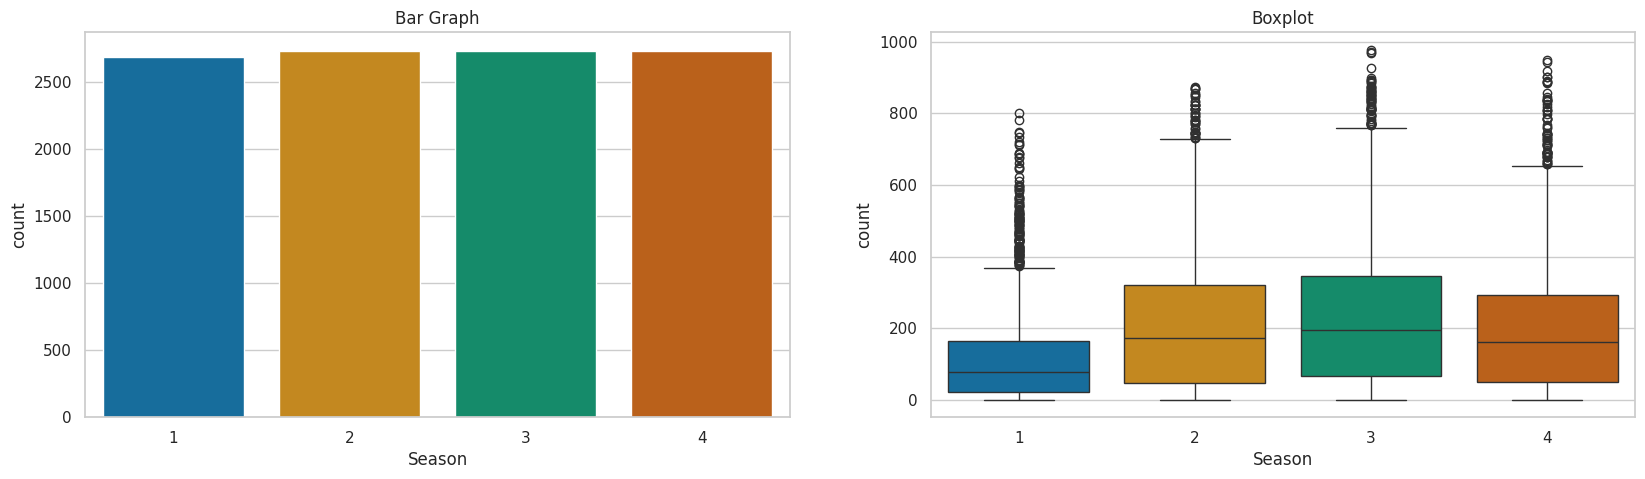

In [ ]:
# Distribution plot and Box plot of 'season' feature

plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.countplot(x = dfn['season'], palette='colorblind')
plt.xlabel('Season')
plt.title('Bar Graph')

plt.subplot(1, 2, 2)
sns.boxplot(x=dfn['season'], y=dfn['count'], palette = 'colorblind')
plt.xlabel('Season')
plt.title('Boxplot')

plt.show()

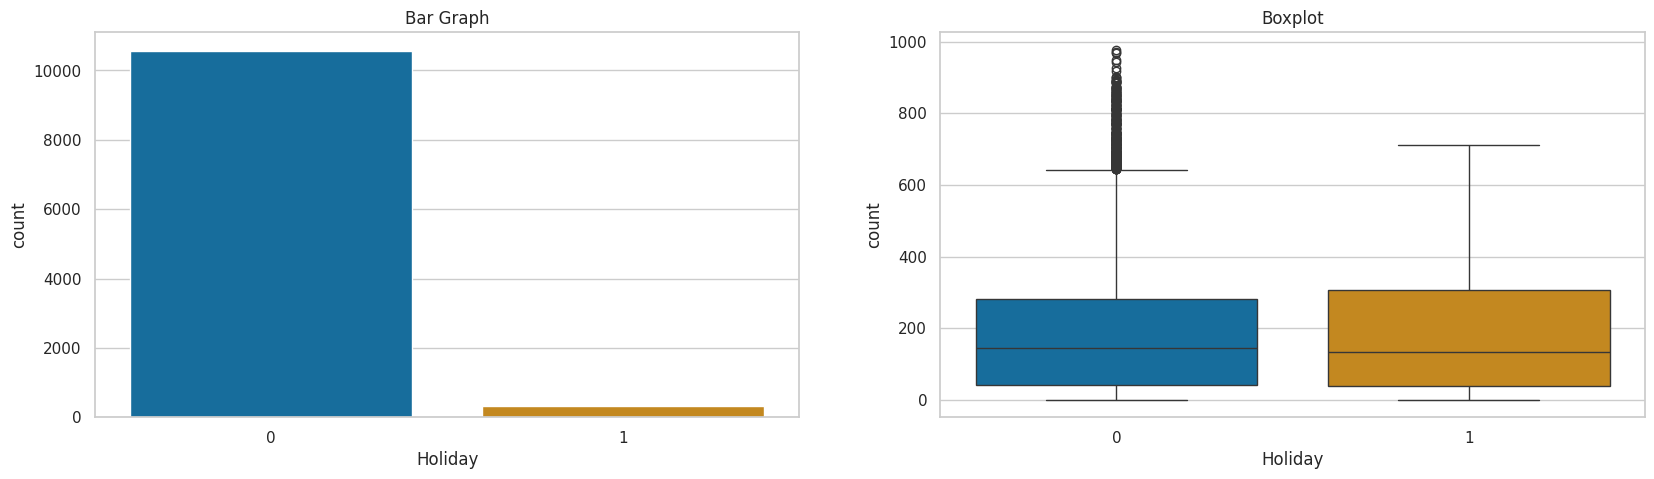

In [ ]:
# Distribution of feature 'holiday'

plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.countplot(x = dfn['holiday'], palette='colorblind')
plt.xlabel('Holiday')
plt.title('Bar Graph')

plt.subplot(1, 2, 2)
sns.boxplot(x=dfn['holiday'], y=dfn['count'], palette = 'colorblind')
plt.xlabel('Holiday')
plt.title('Boxplot')

plt.show()

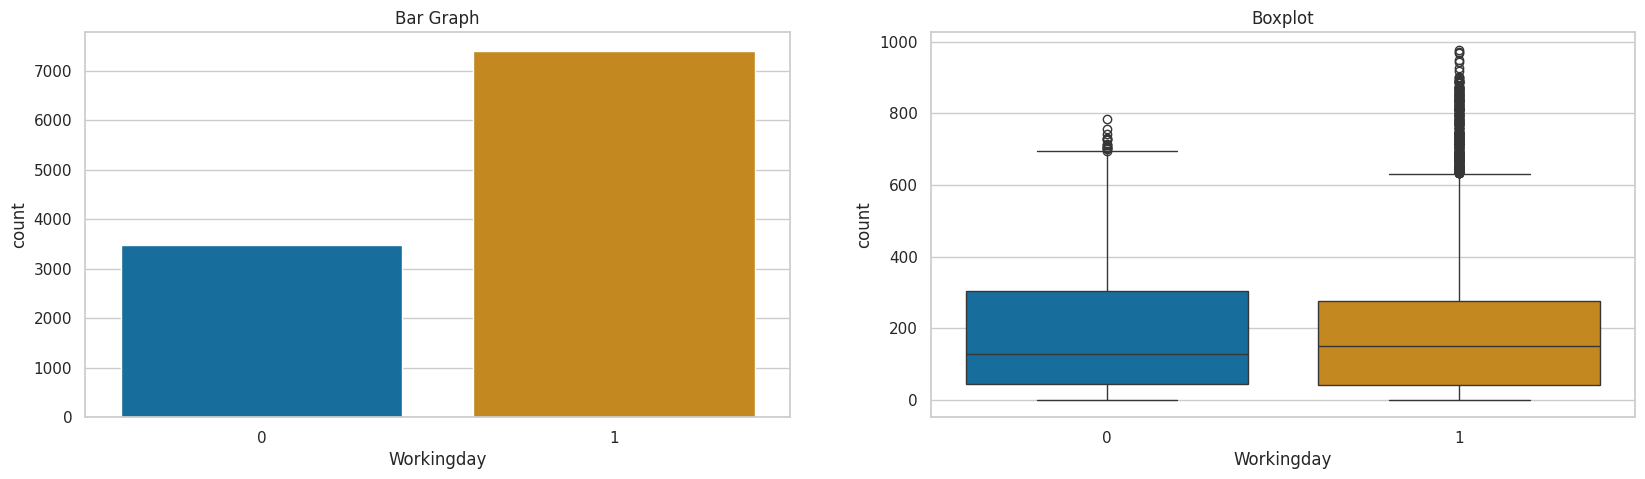

In [ ]:
# Distribution of feature 'workingday'

plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.countplot(x = dfn['workingday'], palette='colorblind')
plt.xlabel('Workingday')
plt.title('Bar Graph')

plt.subplot(1, 2, 2)
sns.boxplot(x=dfn['workingday'], y=dfn['count'], palette = 'colorblind')
plt.xlabel('Workingday')
plt.title('Boxplot')

plt.show()

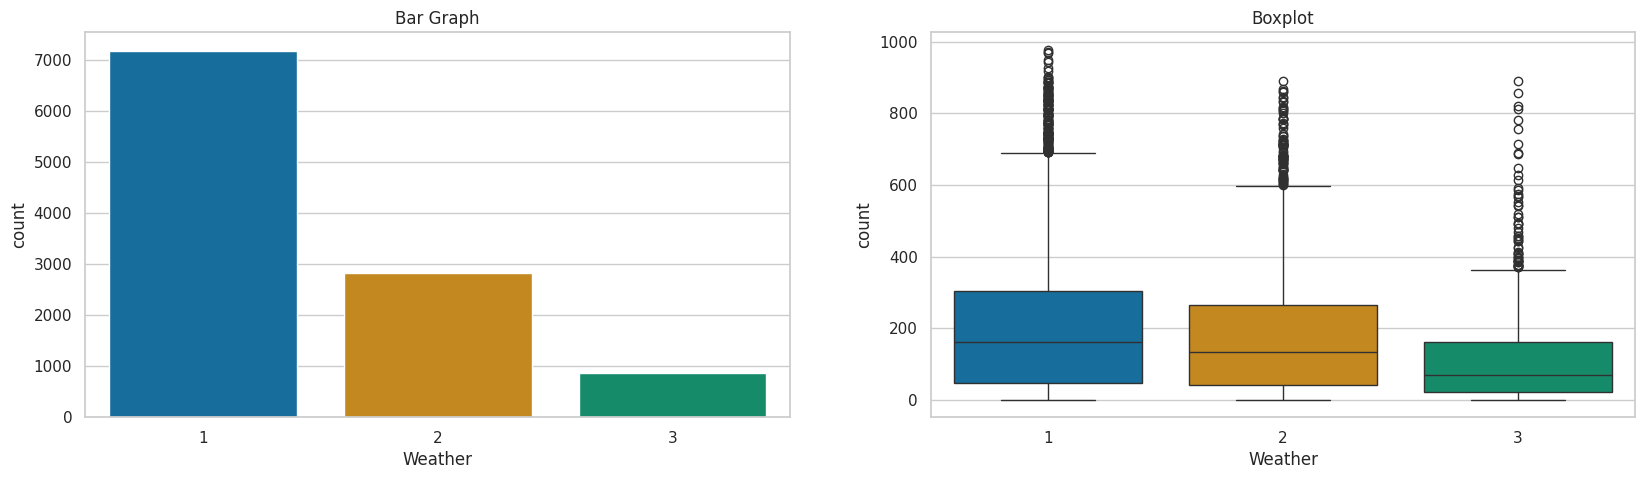

In [ ]:
# Distribution of feature 'weather'

plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.countplot(x = dfn['weather'], palette='colorblind')
plt.xlabel('Weather')
plt.title('Bar Graph')

plt.subplot(1, 2, 2)
sns.boxplot(x=dfn['weather'], y=dfn['count'], palette = 'colorblind')
plt.xlabel('Weather')
plt.title('Boxplot')

plt.show()

## We can notice outliers in some features:

### 1. Humidity
### 2. Windspeed
### 3. Season
### 4. Holiday
### 5. Workingday
### 6. Weather

# Now, Analyzing the Target Variable 'count' visually, for checking the distribution as well for outliers

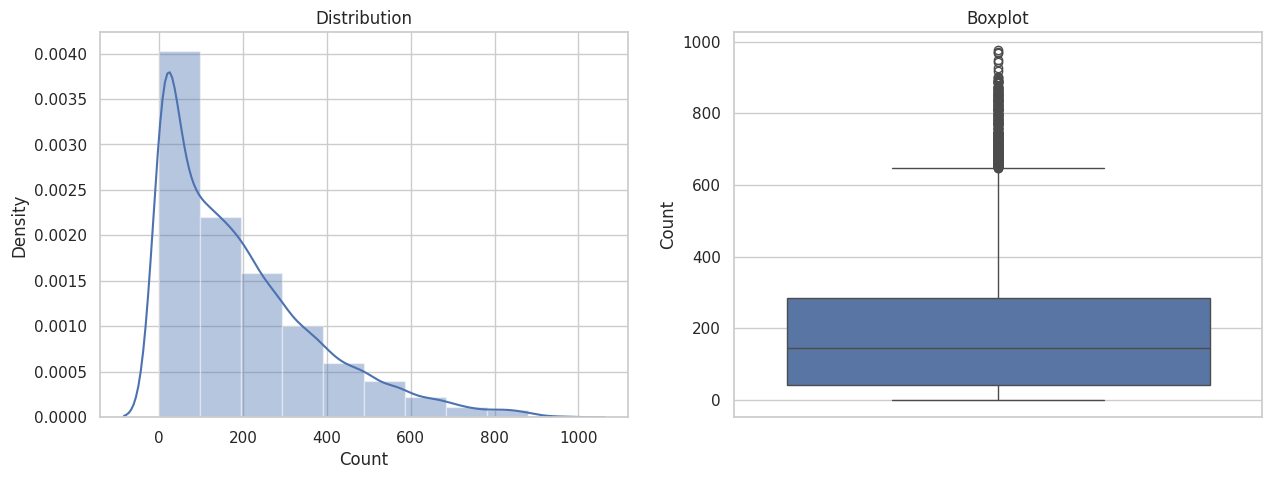

In [ ]:
# Checking distribution of 'count' column -
plt.figure(figsize=(15, 5))

# Distribution Plot
plt.subplot(1, 2, 1)
sns.distplot(dfn['count'], bins=10)
plt.xlabel('Count')
plt.title('Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['count'])
plt.ylabel('Count')
plt.title('Boxplot')

plt.show()

#### Outliers in Independent Variables:

* Distort Relationships: Outliers in independent variables can skew their distributions and potentially lead to misleading results in our hypothesis tests. They can inflate variance, making it harder to detect true relationships with the target.
* Impact Model Training: When we eventually build our ML model, these outliers can disproportionately influence the model's learning process. Algorithms might try to fit these extreme values, leading to a model that doesn't generalize well to the majority of our data.
* Affect Feature Scaling: If we plan to use feature scaling techniques (like standardization or normalization), outliers can significantly impact the scaling range, squeezing the majority of our data into a very small interval.

#### Outliers in the Target Variable:

* Skew Model Evaluation: Outliers in the target variable can heavily influence our model's evaluation metrics (like Mean Squared Error). A few extreme prediction errors on outlier target values can inflate the overall error, making our model seem worse than it actually is on typical data points.
* Bias Model Learning: If our model tries to predict these extreme target values, it might learn a suboptimal mapping for the more common data points. This can lead to a model that performs poorly on the majority of our data.
* Violation of Model Assumptions: Some regression models assume a certain distribution of the error term (residuals), often assumed to be normally distributed with constant variance. Outliers in the target variable can violate these assumptions.

#### Outliers Treatment Approaches:

The strategies for handling outliers in both types of variables are similar (investigation, removal with caution, transformation, winsorizing). However, the reasoning behind the treatment might differ slightly:

* Independent Variables: The focus is often on ensuring the variables' distributions are suitable for the chosen statistical tests and that the outliers don't unduly influence the model's learning of the relationships with the target.

* Target Variable: The focus is often on ensuring a stable and representative evaluation of the model's performance and preventing the model from being overly influenced by rare, extreme outcomes.

### Observation:

We can see that outliers are present in the given columns. We need to figure out a way to deal with them before starting with the tests.

We have multiple options available on how to proceed with these outlier values.

1. Try to understand if these values make any sense according to the business problem. If yes, then we can keep them as it is.
2. In case these outliers are some invalid values which do not make much sense, we can remove them using the IQR.
3. Or we can apply a log transformation on the data to reduce the effect of these outliers.

#### Course of action:

* The outliers in the given data set are the no. of bike rides per session/day. These values could sometimes be higher than expected due to increase in the crowd on certain days/occasions.
* These data values are important for capturing variations in the data. Hence, in this case, the ideal approach of dealing with outliers would be to leave them as it is.
* But since the tests that we are going to apply are based on the assumption that the dataset is normal or near normal, we can drop those outlier values using the IQR method or to avoid loss of information we should rather go ahead with log transformation.


##Note: We can also try both approaches i.e.
### i. we can leave the outliers as is, and then build our model and recheck model performance


### ii. If not, applying transformations and go ahead with the testing and check if our model delivers and performs well.



### i. leaving the outliers as is, because it makes more sense to analyse the information which these outliers carry. why am i saying this is due to the reason that these outliers are not actually outliers but the extreme values which are actually desirable in the context of our business case. In simple words, the factors contibuting to these extreme count values must be analysed so that the same could be replicated for the other features resulting in a betterment of the business.  


#### Aggregating the total no. of bike rides based on the given factors -

In [ ]:
# 1. Workingday -
pd.DataFrame(dfn.groupby('workingday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
# 2. Holiday -
pd.DataFrame(dfn.groupby('holiday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [ ]:
# 3. Season -
pd.DataFrame(dfn.groupby('season')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
# 4. Weather -
pd.DataFrame(dfn.groupby('weather')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


## Ques. 1 - Is there any significant difference between the no. of bike rides on weekdays and weekends?

#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.

$H_a:$ The demand of bikes on weekdays is less than the demand of bikes on weekend.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 >= \mu_2$

$H_a: \mu_1 < \mu_2$

#### **Step 2:** Setting the Significance Level (α):
#### In our scenario, we are testing our Hypothesis at 5% or 0.05 level of significance.

#### **Step 3:** Select an appropriate test

#### Note: Population S.D. is not known to us. so we can use 2 sample t test or t test independent, if its prerequisite assumptions are satisfied. If they are violated, we will have to take help from non-parametric test such as Mann_whittney U test.

#### we are taking same no. of samples from two different populations for conducting the tests because:
* Unequal sample sizes can lead to unequal variances between samples, which affects the assumption of equal variances in tests like t-test, ANOVA, etc.

* Having both unequal sample sizes and variances dramatically affects the statistical power of a test.


In [ ]:
weekday = dfn[dfn['workingday'] == 1]['count'].sample(2999, random_state=25) # Added random_state for reproducibility
weekend = dfn[dfn['workingday'] == 0]['count'].sample(2999, random_state=25)

#### As the 2 variables, which we are analysing, are of discrete ('workday', with 2 categories) and continous ('count') in nature. Moreover, there is absence of Population S.D., t-test is the most suited contender here to check for significance between these variable. But for that, we'll have to check if the prerequisites assumptions are met or not, otherwise we'll have to look for alternate (non-parametric test) options.

#### The t-test has important assumptions that must be satisfied in order for the associated p-value to be valid which are as follows:

* #### The samples are independent.
* #### Each sample is from a normally distributed population.
* #### The population variance of the groups are all equal.

Assumption 1: We are drawing random samples from our feature so we can assume that this assumption holds true in this case.

------------------------------------------------------------------------------------------

Verifying Assumption 2: checking for normality: using statistical test - Shapiro Wilk test (for this test to be reliable, sample size should be between 50 - 2000)

In [ ]:
# H0 = Samples are drawn from normal distribution
# Ha = Samples are not drawn from normal distribution
# alpha = 0.05

# Shapiro-Wilk Test
shapiro_stat_s1, shapiro_p_s1 = shapiro(weekday)
print(f"Shapiro-Wilk Test for Sample 1: statistic={shapiro_stat_s1:.3f}, p-value={shapiro_p_s1:.3f}")

shapiro_stat_s2, shapiro_p_s2 = shapiro(weekend)
print(f"Shapiro-Wilk Test for Sample 2: statistic={shapiro_stat_s1:.3f}, p-value={shapiro_p_s1:.3f}")

Shapiro-Wilk Test for Sample 1: statistic=0.876, p-value=0.000
Shapiro-Wilk Test for Sample 2: statistic=0.876, p-value=0.000


##### Conclusion:
##### i) Since the p-values of shapiro for both the samples are very low, we can reject null hypothesis that samples come from normally distributed population.
##### ii) Assumption of normality is violated.

------------------------------------------------------------------------------------------

##### Verifying Assumption 3: checking for variances of the groups: using - Levene test

In [ ]:
# checking for variances of the groups: using statistical test - Levene test

# H0 = There is no significant difference in variances between weekday and weekend bike rental counts.
# Ha = There is a significant difference in variances between weekday and weekend bike rental counts.

# Perform Levene's test
levene_stat, levene_p = levene(weekday, weekend)

print("\n--- Levene's Test for Equality of Variances ---")
print(f"Levene's statistic: {levene_stat:.3f}")
print(f"Levene's p-value: {levene_p:.3f}")

# Interpret the results
alpha = 0.05
if levene_p > alpha:
    print(f"\nThe p-value ({levene_p:.3f}) is greater than the significance level ({alpha}).")
    print("We fail to reject the null hypothesis. There is no significant difference in variances between weekday and weekend bike rental counts.")
else:
    print(f"\nThe p-value ({levene_p:.3f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis. There is a significant difference in variances between weekday and weekend bike rental counts.")


--- Levene's Test for Equality of Variances ---
Levene's statistic: 0.004
Levene's p-value: 0.947

The p-value (0.947) is greater than the significance level (0.05).
We fail to reject the null hypothesis. There is no significant difference in variances between weekday and weekend bike rental counts.


#### Conclusion:
#### i)  There is no significant difference in variances between weekday and weekend bike rental counts.
#### ii) Assumption of Homogenity of variances is satisfied.


#### As one of the assumptions required for T-test is violated, we should avoid using T test as it can be unreliable instead we could use a non-parametric test as alternate because these non-parametric test doesn't require any pre-requisite assumptions. Here we can use **Mann-Whitney U Test**   

#### **Step 4:** Calculating the P-value:

#### Note: It represents the Probability of getting an observation as extreme or even more extreme under the assumption of Null Hypothesis being True. In simpler words, if p_value is found to be greater than our chosen alpha (significance level) value it is safe to say with 95% confidence that we fail to reject our Null Hypothesis or if its value is less than our chosen alpha we can reject Null Hypothesis with 95% confidence.

In [ ]:
u_statistic, p_value = mannwhitneyu(weekday, weekend, alternative='less')

print(f"Mann-Whitney U statistic: {u_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05  # significance level
if p_value > alpha:
    print(f"\nThe p-value ({p_value:.3f}) is greater than the significance level ({alpha}).")
    print("We fail to reject the null hypothesis.")
    print("we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than or equal to those on weekends.")
else:
    print(f"\nThe p-value ({p_value:.3f}) is less than or equal to the significance level ({alpha}).")
    print("We reject the null hypothesis.")
    print("we have enough statistical evidence to say that the average no. of bike rides during weekdays is lesser than to those on weekends.")

print("\n--- Interpretation ---")
print("The Mann-Whitney U test is a non-parametric test that compares the distributions of two independent groups.")
print("A significant p-value suggests that the two groups are different in terms of their central tendency or overall distribution.")
print("It does not specifically tell us about the means or medians unless we assume the distributions have the same shape.")

Mann-Whitney U statistic: 4484381.000
P-value: 0.425

The p-value (0.425) is greater than the significance level (0.05).
We fail to reject the null hypothesis.
we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than or equal to those on weekends.

--- Interpretation ---
The Mann-Whitney U test is a non-parametric test that compares the distributions of two independent groups.
A significant p-value suggests that the two groups are different in terms of their central tendency or overall distribution.
It does not specifically tell us about the means or medians unless we assume the distributions have the same shape.


#### Note: Still verifying this result using t-test independent.

In [ ]:
t_statistic, p_value = ttest_ind(weekday, weekend, alternative = 'less')

print(f"t-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05  # significance level
if p_value > alpha:
    print(f"\nThe p-value ({p_value:.3f}) is greater than the significance level ({alpha}).")
    print("We fail to reject the null hypothesis.")
    print("we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than or equal to those on weekends.")
else:
    print(f"\nThe p-value ({p_value:.3f}) is less than or equal to the significance level ({alpha}).")
    print("We reject the null hypothesis.")
    print("we have enough statistical evidence to say that the average no. of bike rides during weekdays is lesser than to those on weekends.")

t-statistic: 0.925
P-value: 0.822

The p-value (0.822) is greater than the significance level (0.05).
We fail to reject the null hypothesis.
we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than or equal to those on weekends.


Conclusion:

This also proves the result we got above using Mann Whitney U test.

#### **Step 5:** Making a Decision

#### i) As 'test of normality' assumption for our samples failed, we went ahead with Mann-Whitney U test instead of independent t-test, although this test is considered weaker as compared to t-test independent (which is a parametric test).
#### ii) As our p_value is coming out to be greater than our chosen alpha (0.05), we **Fail to Reject our Null Hypothesis**.


# **Interpretation -  From the conclusion of our Hypothesis testing, we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than or equal to those on weekends.**

---
## Ques. 2 - Is there any significant difference between the no. of bike rides on regular days and holidays?
---

#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ The demand of bikes on regular days is greater or similar to the demand of bikes on holidays.

$H_a:$ The demand of bikes on regular days is less than the demand of bikes on holidays.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on regular days and holidays respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 >= \mu_2$

$H_a: \mu_1 < \mu_2$

#### **Step 2:** Decide the significance level

### The significance level (α) is already set to 5% i.e., 0.05

#### **Step 3:** Select an appropriate test

#### We know that Population S.D. is not known to us. so we can use 2 sample t test or t test independent, if its prerequisite assumptions are satisfied. If they are violated, we will have to take help from non-parametric test such as Mann_whittney U test.

#### Note: We are taking same no. of samples from two different populations for conducting the tests because:
* Unequal sample sizes can lead to unequal variances between samples, which affects the assumption of equal variances in tests like t-test, ANOVA, etc.

* Having both unequal sample sizes and variances dramatically affects the statistical power of a test.


In [ ]:
holiday = dfn[dfn['holiday'] == 1]['count'].sample(299, random_state=25) # Added random_state for reproducibility
regular = dfn[dfn['holiday'] == 0]['count'].sample(299, random_state=25)

#### As the 2 variables, which we are analysing, are of discrete ('holiday', with 2 categories) and continous ('count') in nature. Moreover, there is absence of Population S.D., t-test is the most suited contender here to check for significance between these variable. But for that, we'll have to check if the prerequisites assumptions are met or not, otherwise we'll have to look for alternate (non-parametric test) options.

#### The t-test has important assumptions that must be satisfied in order for the associated p-value to be valid which are as follows:

* #### The samples are independent.
* #### Each sample is from a normally distributed population.
* #### The population variance of the groups are all equal.

### Assumption 1: We are drawing random samples from our feature so we can assume that this assumption holds true in this case.

### Verifying Assumption 2: checking for normality: using statistical test - Shapiro Wilk test (for this test to be reliable, sample size should be between 50 - 2000)

In [ ]:
# H0 = Samples are drawn from normal distribution
# Ha = Samples are not drawn from normal distribution
# alpha = 0.05

# Shapiro-Wilk Test
shapiro_stat_s1, shapiro_p_s1 = shapiro(holiday)
print(f"Shapiro-Wilk Test for Sample 1: statistic={shapiro_stat_s1:.3f}, p-value={shapiro_p_s1:.3f}")

shapiro_stat_s2, shapiro_p_s2 = shapiro(regular)
print(f"Shapiro-Wilk Test for Sample 2: statistic={shapiro_stat_s1:.3f}, p-value={shapiro_p_s1:.3f}")

Shapiro-Wilk Test for Sample 1: statistic=0.889, p-value=0.000
Shapiro-Wilk Test for Sample 2: statistic=0.889, p-value=0.000


##### Conclusion:
##### i) Since the p-values of shapiro for both the samples are very low, we can reject null hypothesis that samples come from normally distributed population.
##### ii) Assumption of normality is violated.

### Verifying Assumption 3: checking for variances of the groups: using Levene test

In [ ]:
# checking for variances of the groups: using Levene test

# H0 = There is no significant difference in variances between holiday and regular day bike rental counts.
# Ha = There is a significant difference in variances between holiday and regular day bike rental counts.

# Perform Levene's test
levene_stat, levene_p = levene(holiday, regular)

print("\n--- Levene's Test for Equality of Variances ---")
print(f"Levene's statistic: {levene_stat:.3f}")
print(f"Levene's p-value: {levene_p:.3f}")

# Interpret the results
alpha = 0.05
if levene_p > alpha:
    print(f"\nThe p-value ({levene_p:.3f}) is greater than the significance level ({alpha}).")
    print("We fail to reject the null hypothesis. There is no significant difference in variances between holiday and regular day bike rental counts.")
else:
    print(f"\nThe p-value ({levene_p:.3f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis. There is a significant difference in variances between holiday and regular day bike rental counts.")


--- Levene's Test for Equality of Variances ---
Levene's statistic: 0.048
Levene's p-value: 0.826

The p-value (0.826) is greater than the significance level (0.05).
We fail to reject the null hypothesis. There is no significant difference in variances between holiday and regular day bike rental counts.


#### Conclusion:
#### i)  There is no significant difference in variances between holiday and regular bike rental counts.
#### ii) Assumption of Homogenity of variances is satisfied.


#### As one of the assumptions required for T-test is violated, we should avoid using T test as it can be unreliable instead we could use a non-parametric test as alternate because these non-parametric test doesn't require any pre-requisite assumptions. Here we can use **Mann-Whitney U Test**   

#### **Step 4:** Calculating the P-value:

#### Note: It represents the Probability of getting an observation as extreme or even more extreme under the assumption of Null Hypothesis being True. In simpler words, if p_value is found to be greater than our chosen alpha (significance level) value it is safe to say with 95% confidence that we fail to reject our Null Hypothesis or if its value is less than our chosen alpha we can reject Null Hypothesis with 95% confidence.

In [ ]:
u_statistic, p_value = mannwhitneyu(regular, holiday, alternative='less')

print(f"Mann-Whitney U statistic: {u_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05  # significance level
if p_value > alpha:
    print(f"\nThe p-value ({p_value:.3f}) is greater than the significance level ({alpha}).")
    print("We fail to reject the null hypothesis.")
    print("We have enough statistical evidence to say that the average no. of bike rides during regular days is greater than or equal to those on holidays.")
else:
    print(f"\nThe p-value ({p_value:.3f}) is less than or equal to the significance level ({alpha}).")
    print("We reject the null hypothesis.")
    print("We have enough statistical evidence to say that the average no. of bike rides during regular days is lesser than those on holidays.")

print("\n--- Interpretation ---")
print("The Mann-Whitney U test is a non-parametric test that compares the distributions of two independent groups.")
print("A significant p-value suggests that the two groups are different in terms of their central tendency or overall distribution.")
print("It does not specifically tell us about the means or medians unless we assume the distributions have the same shape.")

Mann-Whitney U statistic: 46004.000
P-value: 0.731

The p-value (0.731) is greater than the significance level (0.05).
We fail to reject the null hypothesis.
We have enough statistical evidence to say that the average no. of bike rides during regular days is greater than or equal to those on holidays.

--- Interpretation ---
The Mann-Whitney U test is a non-parametric test that compares the distributions of two independent groups.
A significant p-value suggests that the two groups are different in terms of their central tendency or overall distribution.
It does not specifically tell us about the means or medians unless we assume the distributions have the same shape.


#### Note: Still verifying this result using t-test independent.

In [ ]:
test_stat, p_value = ttest_ind(regular, holiday, equal_var=False, alternative='less')
print('The p-value is : ', p_value)

if p_value < alpha:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
  print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

The p-value is :  0.7413791898146649
As the p-value 0.7413791898146649 is greater than the level of significance, we fail to reject the null hypothesis.


Conclusion:

This also proves the result we got above using Mann Whitney U test.

#### **Step 5:** Making a Decision

#### i) As 'test of normality' assumption for our samples failed, we went ahead with Mann-Whitney U test instead of independent t-test, although this test is considered weaker as compared to t-test independent (which is a parametric test).
#### ii) As our p_value is coming out to be greater than our chosen alpha (0.05), we **Fail to Reject our Null Hypothesis**.


# **Interpretation -  From the conclusion of our Hypothesis testing, we can say with 95% confidence that the average no. of bike rides during regular days is greater than or equal to those on holidays.**

---
## Ques. 3 - Is the demand of bicycles on rent same for different weather conditions?
---

#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ The average no. of bike rides in different weather conditions  are equal.

$H_a:$ The average no. of bike rides in different weather conditions are not equal.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

#### **Step 2:** Decide the significance level

#### The significance level (α) is already set to 5% i.e., 0.05

#### **Step 3:** Select an appropriate test

In [ ]:
dfn = dfn[~(dfn['weather']==4)] # we have excluded the records for the weather condition = 4, as the number of records are quite low and won't be of much value to us for now.

In [ ]:
w1 = dfn[dfn['weather'] == 1]['count'].sample(750, random_state=25) # Added random_state for reproducibility
w2 = dfn[dfn['weather'] == 2]['count'].sample(750, random_state=25)
w3 = dfn[dfn['weather'] == 3]['count'].sample(750, random_state=25)

In [ ]:
dfn.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


This is a problem, concerning three independent population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population variance of the groups are all equal.

**Assumption 1:** We are drawing random samples from our feature so we can assume that this assumption holds true in this case.

Now, we will be using the following statistical tests to check the normality and euality of variance of the data set -

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Verifying Assumption 2:** checking for normality: using statistical test - Shapiro Wilk test (for this test to be reliable, sample size should be between 50 - 2000)

In [ ]:
# Testing of normality, Shapiro-Wilk’s test is applied to the response variable.

samples = [w1, w2, w3]
sample_names = ["Weather Condition 1", "Weather Condition 2", "Weather Condition 3"]
alpha = 0.05

print("Shapiro-Wilk Normality Test Results:")
for i, sample in enumerate(samples):
    stat, p = shapiro(sample)
    print(f"\n{sample_names[i]}: Shapiro-Wilk Statistic = {stat:.3f}, p-value = {p:.3f}")
    if p > alpha:
        print(f"{sample_names[i]} appears to be normally distributed (fail to reject H0)")
    else:
        print(f"{sample_names[i]} does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Normality Test Results:

Weather Condition 1: Shapiro-Wilk Statistic = 0.889, p-value = 0.000
Weather Condition 1 does not appear to be normally distributed (reject H0)

Weather Condition 2: Shapiro-Wilk Statistic = 0.883, p-value = 0.000
Weather Condition 2 does not appear to be normally distributed (reject H0)

Weather Condition 3: Shapiro-Wilk Statistic = 0.768, p-value = 0.000
Weather Condition 3 does not appear to be normally distributed (reject H0)


##### Conclusion:
##### i) Since the p-values of shapiro for all the samples are very low, we can reject null hypothesis that samples come from normally distributed population.
##### ii) Assumption of normality is violated.
##### iii) Since ANOVA is reasonably robust to violations of normality, especially when the sample sizes in each group are equal and reasonably large (generally > 30-40 per group). We could still consider ANOVA. But first, let us validate the 3rd assumption for ANOVA as well.

##### **Verifying Assumption 3:** checking for variances of the groups: using - Levene test


In [ ]:
statistic, p_value = levene(w1, w2, w3)

alpha = 0.05
print("Levene's Test for Equal Variances:")
print(f"Statistic: {statistic:.3f}, p-value: {p_value:.3f}")

if p_value > alpha:
    print("The variances of the samples are likely equal (fail to reject H0)")
else:
    print("The variances of the samples are likely not equal (reject H0)")

Levene's Test for Equal Variances:
Statistic: 51.335, p-value: 0.000
The variances of the samples are likely not equal (reject H0)


##### Conclusion:
##### i)  The variances of the samples are likely not equal.
##### ii) Assumption of Homogenity of variances is violated.

Both the normality assumption (based on the Shapiro-Wilk test) and the equal variances assumption (based on Levene's test) are violated for all our three samples (w1, w2, w3), then standard one-way ANOVA is likely not the most appropriate statistical test to compare the means of these groups.

In this situation, we should strongly consider using statistical methods that do not rely on these assumptions like **Non-Parametric Alternative: Kruskal-Wallis Test**

#### **Step 4:** Calculating the P-value:

#### Note: It represents the Probability of getting an observation as extreme or even more extreme under the assumption of Null Hypothesis being True. In simpler words, if p_value is found to be greater than our chosen alpha (significance level) value it is safe to say with 95% confidence that we fail to reject our Null Hypothesis or if its value is less than our chosen alpha we can reject Null Hypothesis with 95% confidence.

In [ ]:
# Using non-parametric test
statistic, p_value = kruskal(w1, w2, w3)

alpha = 0.05
print("Kruskal-Wallis Test Results:")
print(f"Statistic: {statistic:.3f}, p-value: {p_value:.3f}")

if p_value > alpha:
    print("The average no. of bike rides in different weather conditions are not equal (fail to reject H0).")
else:
    print("The average no. of bike rides in different weather conditions are not equal (reject H0).")

Kruskal-Wallis Test Results:
Statistic: 109.995, p-value: 0.000
The average no. of bike rides in different weather conditions are not equal (reject H0).


#### Note: Still verifying this result using One way ANOVA.

In [ ]:
test_stat, p_value = f_oneway(w1, w2, w3)
print('The p-value is : ', p_value)

if p_value > alpha:
    print("The average no. of bike rides in different weather conditions are not equal (fail to reject H0).")
else:
    print("The average no. of bike rides in different weather conditions are not equal (reject H0).")

The p-value is :  3.0221970025811667e-26
The average no. of bike rides in different weather conditions are not equal (reject H0).


Conclusion:

This also proves the result we got above using Kruskal-Wallis Test.

#### **Step 5:** Making a Decision

#### i) As 'test of normality' and ' test of homoscadestisity' assumption for our samples failed, we went ahead with Kruskal-Wallis Test instead of one-way anova, although this test is considered weaker as compared to one-way anova test (which is a parametric test).
#### ii) As our p_value is coming out to be less than our chosen alpha (0.05), we **Reject our Null Hypothesis**.


# **Interpretation -  From the conclusion of our Hypothesis testing, we can say with 95% confidence that the we have enough statistical evidence to say that the average no. of bike rides in different weather conditions are not equal.**

---
### Ques. 4 - Is the demand of bicycles on rent same for different seasons?
---

#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ The average no. of bike rides in different seasons  are equal.

$H_a:$ The average no. of bike rides in different seasons are not equal.

#### **Step 2:** Decide the significance level

### The significance level (α) is already set to 5% i.e., 0.05

#### **Step 3:** Select an appropriate test

In [ ]:
s1 = dfn[dfn['season'] == 1]['count'].sample(2399, random_state = 25)
s2 = dfn[dfn['season'] == 2]['count'].sample(2399, random_state = 25)
s3 = dfn[dfn['season'] == 3]['count'].sample(2399, random_state = 25)
s4 = dfn[dfn['season'] == 3]['count'].sample(2399, random_state = 25)

In [ ]:
dfn.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


This is a problem, concerning 4 independent population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population variance of the groups are all equal.

**Assumption 1:** We are drawing random samples from our feature so we can assume that this assumption holds true in this case.

Now, we will be using the following statistical tests to check the normality and euality of variance of the data set -

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Verifying Assumption 2:** checking for normality: using statistical test - Shapiro Wilk test (for this test to be reliable, sample size should be between 50 - 2000)

In [ ]:
# Testing of normality, Shapiro-Wilk’s test is applied to the response variable.

samples = [s1, s2, s3, s4]
sample_names = ["Season 1", "Season 2", "Season 3", "Season 4"]
alpha = 0.05

print("Shapiro-Wilk Normality Test Results:")
for i, sample in enumerate(samples):
    stat, p = shapiro(sample)
    print(f"\n{sample_names[i]}: Shapiro-Wilk Statistic = {stat:.3f}, p-value = {p:.3f}")
    if p > alpha:
        print(f"{sample_names[i]} appears to be normally distributed (fail to reject H0)")
    else:
        print(f"{sample_names[i]} does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Normality Test Results:

Season 1: Shapiro-Wilk Statistic = 0.808, p-value = 0.000
Season 1 does not appear to be normally distributed (reject H0)

Season 2: Shapiro-Wilk Statistic = 0.903, p-value = 0.000
Season 2 does not appear to be normally distributed (reject H0)

Season 3: Shapiro-Wilk Statistic = 0.915, p-value = 0.000
Season 3 does not appear to be normally distributed (reject H0)

Season 4: Shapiro-Wilk Statistic = 0.915, p-value = 0.000
Season 4 does not appear to be normally distributed (reject H0)


##### Conclusion:
##### i) Since the p-values of shapiro for all the samples are very low, we can reject null hypothesis that samples come from normally distributed population.
##### ii) Assumption of normality is violated.
##### iii) Since ANOVA is reasonably robust to violations of normality, especially when the sample sizes in each group are equal and reasonably large (generally > 30-40 per group). We could still consider ANOVA. But first, let us validate the 3rd assumption for ANOVA as well.

##### **Verifying Assumption 3:** checking for variances of the groups: using - Levene test


In [ ]:
statistic, p_value = levene(s1, s2, s3, s4)

alpha = 0.05
print("Levene's Test for Equal Variances:")
print(f"Statistic: {statistic:.3f}, p-value: {p_value:.3f}")

if p_value > alpha:
    print("The variances of the samples are likely equal (fail to reject H0)")
else:
    print("The variances of the samples are likely not equal (reject H0)")

Levene's Test for Equal Variances:
Statistic: 183.109, p-value: 0.000
The variances of the samples are likely not equal (reject H0)


##### Conclusion:
##### i)  The variances of the samples are likely not equal.
##### ii) Assumption of Homogenity of variances is violated.

Both the normality assumption (based on the Shapiro-Wilk test) and the equal variances assumption (based on Levene's test) are violated for all our 4 samples (s1, s2, s3, s4), then standard one-way ANOVA is likely not the most appropriate statistical test to compare the means of these groups.

In this situation, we should strongly consider using statistical methods that do not rely on these assumptions like **Non-Parametric Alternative: Kruskal-Wallis Test**

#### **Step 4:** Calculating the P-value:

#### Note: It represents the Probability of getting an observation as extreme or even more extreme under the assumption of Null Hypothesis being True. In simpler words, if p_value is found to be greater than our chosen alpha (significance level) value it is safe to say with 95% confidence that we fail to reject our Null Hypothesis or if its value is less than our chosen alpha we can reject Null Hypothesis with 95% confidence.

In [ ]:
# Using non-parametric test
statistic, p_value = kruskal(s1, s2, s3, s4)

alpha = 0.05
print("Kruskal-Wallis Test Results:")
print(f"Statistic: {statistic:.3f}, p-value: {p_value:.3f}")

if p_value > alpha:
    print("The average no. of bike rides in different seasonal conditions are not equal (fail to reject H0).")
else:
    print("The average no. of bike rides in different seasonal conditions are not equal (reject H0).")

Kruskal-Wallis Test Results:
Statistic: 711.127, p-value: 0.000
The average no. of bike rides in different seasonal conditions are not equal (reject H0).


#### Note: Still verifying this result using One way ANOVA.

In [ ]:
test_stat, p_value = f_oneway(s1, s2, s3, s4)
print('The p-value is : ', p_value)

if p_value > alpha:
    print("The average no. of bike rides in different seasonal conditions are not equal (fail to reject H0).")
else:
    print("The average no. of bike rides in different seasonal conditions are not equal (reject H0).")

The p-value is :  4.589981806499586e-147
The average no. of bike rides in different seasonal conditions are not equal (reject H0).


Conclusion:

This also proves the result we got above using Kruskal-Wallis Test.

#### **Step 5:** Making a Decision

#### i) As 'test of normality' and ' test of homoscadestisity' assumption for our samples failed, we went ahead with Kruskal-Wallis Test instead of one-way anova, although this test is considered weaker as compared to one-way anova test (which is a parametric test).
#### ii) As our p_value is coming out to be less than our chosen alpha (0.05), we **Reject our Null Hypothesis**.


# **Interpretation -  From the conclusion of our Hypothesis testing, we can say with 95% confidence that the we have enough statistical evidence to say that the average no. of bike rides in different seasonal conditions are not equal.**

---
### Ques. 5 -  Are the weather conditions significantly different during different seasons?
---



#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ Weather conditions are independent of the season.

$H_a:$ Weather condition depends on the ongoing season.

#### **Step 2:** Decide the significance level

The significance level (α) is already set to 5% i.e., 0.05

#### **Step 3:** Select an appropriate test

Although the data values in 'season' and 'weather' columns are numerical, as per our intuition, they still represent different catgories. Hence, we will encode them accordingly before moving onto the tests.

In [ ]:
dict1 = {1: 'Sunny',
         2: 'Cloudy',
         3: 'Rainy'}
dfn['weather_enc'] = dfn['weather'].map(dict1)

In [ ]:
dict2 = {1: 'Summer',
         2: 'Monsoon',
         3: 'Winter',
         4: 'Autumn'}
dfn['season_enc'] = dfn['season'].map(dict2)

Here we will be comparing two different categorical variables, 'season' and 'weather'. So will perform a **Chi-square test**.

In [ ]:
contigency= pd.crosstab(dfn.season_enc, dfn.weather_enc)
contigency

weather_enc,Cloudy,Rainy,Sunny
season_enc,,,
Autumn,807,225,1702
Monsoon,708,224,1801
Summer,715,211,1759
Winter,604,199,1930


<Axes: xlabel='season_enc'>

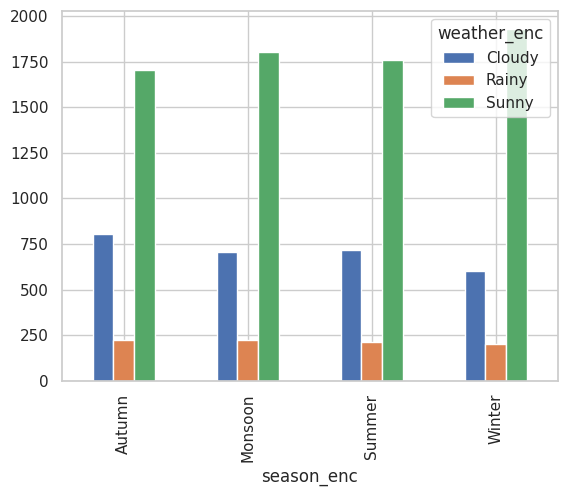

In [ ]:
contigency.plot(kind='bar')

#### **Step 4:** Calculate the p-value

In [ ]:
chi2, p_value, dof, exp_freq = chi2_contingency(contigency, correction=False)
print('Chi-square Statistic: {} \n P-value: {} \n Degree of Freedom: {} \n Expected Frequencies: {}'.format(chi2, p_value, dof, exp_freq))

Chi-square Statistic: 46.10145731073249 
 P-value: 2.8260014509929343e-08 
 Degree of Freedom: 6 
 Expected Frequencies: [[ 711.81956821  215.75617823 1806.42425356]
 [ 711.55920992  215.67726229 1805.76352779]
 [ 699.06201194  211.8892972  1774.04869086]
 [ 711.55920992  215.67726229 1805.76352779]]


#### **Step 5:** Making a Decision

In [ ]:
alpha = 0.05

if p_value > alpha:
    print("Fail to reject H0, We have enough statistical evidence to say that the Weather conditions are independent of the ongoing season")
else:
    print("Reject H0. We have enough statistical evidence to say that the weather conditions are dependent on the ongoing season")

Reject H0. We have enough statistical evidence to say that the weather conditions are dependent on the ongoing season


#### As our p_value is coming out to be less than our chosen alpha (0.05), we **Reject our Null Hypothesis**.


# **Interpretation -  From the conclusion of our Hypothesis testing, we can say with 95% confidence that the we have enough statistical evidence to say that the weather conditions are dependent on the ongoing season.**

### Insights and Recommendations

#### **EDA based insights -**

1. Total 10,886 rows were present in the data set.
2. Neither missing values, nor duplicate rows were found.
3. 'temp' and 'atemp' columns were found to be highly correlated. </br> Dropping one of them (atemp) to avoid multicollinearity.
4. 'count', 'casual' and 'registered' columns were highly correlated. </br> Dropping casual & registered columns to avoid multicollinearity.
5. Outlier values were found in the 'count' column.

#### **Insights from hypothesis testing -**
1. The no. of bikes rented on weekdays is comparatively higher than on weekends.
2. The no. of bikes rented on regular days is comparatively higher than on holidays.
2. The demand of bicycles on rent differs under different weather conditions.
3. The demand of bicycles on rent is different during different seasons.
4. The weather conditions are surely dependent upon the ongoing season.

#### **Miscellaneous observations -**
The distribution of 'count' column wasn't actually normal or near normal. </br> Infact the column's distribution is found to be a bit skewed towards right.

#### **Generic recommendations -**

* The demand of bikes on rent are usually higher during Weekdays.
* The demand of bikes on rent are usually higher during Regular days.
* The chances of person renting a bike are usually higher during Season 3.
* The chances of person renting a bike are usually higher during Weather condition 1.

We recommend the company to maintain the bike stocks accordingly.



In [ ]:
#ii. Checking distribution after applying log transformation -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.distplot(np.log(dfn['count']), bins=10)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(dfn['count']))
plt.title('Boxplot')

plt.show()

# As it is established visually that the outliers are indeed present in the data. Now, for our analysis, we must treat these.

### Insights and Recommendations

#### **EDA based insights -**

1. Total 10,886 rows were present in the data set.
2. Neither missing values, nor duplicate rows were found.
3. 'temp' and 'atemp' columns were found to be highly correlated. </br> Dropping one of them (atemp) to avoid multicollinearity.
4. 'count', 'casual' and 'registered' columns were highly correlated. </br> Dropping casual & registered columns to avoid multicollinearity.
5. Outlier values were found in the 'count' column.

#### **Insights from hypothesis testing -**
1. The no. of bikes rented on weekdays is comparatively higher than on weekends.
2. The no. of bikes rented on regular days is comparatively higher than on holidays.
2. The demand of bicycles on rent differs under different weather conditions.
3. The demand of bicycles on rent is different during different seasons.
4. The weather conditions are surely dependent upon the ongoing season.

#### **Miscellaneous observations -**
The distribution of 'count' column wasn't actually normal or near normal. </br> Infact the column's distribution is found to be a bit skewed towards right.

#### **Generic recommendations -**

* The demand of bikes on rent are usually higher during Weekdays.
* The demand of bikes on rent are usually higher during Regular days.
* The chances of person renting a bike are usually higher during Season 3.
* The chances of person renting a bike are usually higher during Weather condition 1.

We recommend the company to maintain the bike stocks accordingly.

